In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#Cargamos nuestro archivo CSV previamente ya preparado para su analisis, donde lo cargamos con la libreria pandas y mostramos las primeras 5 filas
df = pd.read_csv('Final.csv')

#Eliminamos la categoria de id de las columnas, esta no es necesaria en general solo es 1 categoria y ya se tiene el nombre
#creamos un df de la correlacion unicamente de los valores numericos
df = df.drop(columns=['ID_CATEGORY'])
dfCorr = df.corr(numeric_only=True)

#De nuestro DF principal nos aseguramos que sea de tipo fecha
df['DATE'] = pd.to_datetime(df['DATE'])
df = df[df['BRAND'] == 'VANISH']

#Extraemos en un DF nuevo los datos agrupado por año, formato, attr1, attr2, attr3, sumando las unidades y valor vendido de todo, redondeamos los totales a solo 2
#decimales para que se vea mejor en graficas
dfYearFormatAtts = (df.groupby(['YEAR','FORMAT','ATTR1','ATTR2','ATTR3'])[['TOTAL_UNIT_SALES','TOTAL_VALUE_SALES']].sum().reset_index()
    .sort_values(by=['YEAR','FORMAT','ATTR1','ATTR2','ATTR3','TOTAL_VALUE_SALES'], ascending = [True,True,True,True,True,False]))
dfYearFormatAtts['TOTAL_UNIT_SALES'] = dfYearFormatAtts['TOTAL_UNIT_SALES'].round(2)
dfYearFormatAtts['TOTAL_VALUE_SALES'] = dfYearFormatAtts['TOTAL_VALUE_SALES'].round(2)
dfYearFormatAtts

,YEAR,FORMAT,ATTR1,ATTR2,ATTR3,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES
0,2021,GEL,SAFE BLEACH,FABRIC TREATMENT,BLANCO,5.42,279.08
1,2021,GEL,SAFE BLEACH,FABRIC TREATMENT,ROSA,5.49,443.53
2,2021,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,ROSA,0.01,0.22
3,2021,POLVO,SAFE BLEACH,FABRIC TREATMENT,BLANCO,0.79,61.94
4,2021,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,30.78,364.11
5,2022,GEL,SAFE BLEACH,FABRIC TREATMENT,BLANCO,90.55,4789.45
6,2022,GEL,SAFE BLEACH,FABRIC TREATMENT,ROSA,95.13,6465.43
7,2022,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,ROSA,0.12,5.49
8,2022,POLVO,SAFE BLEACH,FABRIC TREATMENT,BLANCO,26.27,1947.88
9,2022,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,1336.34,16308.38


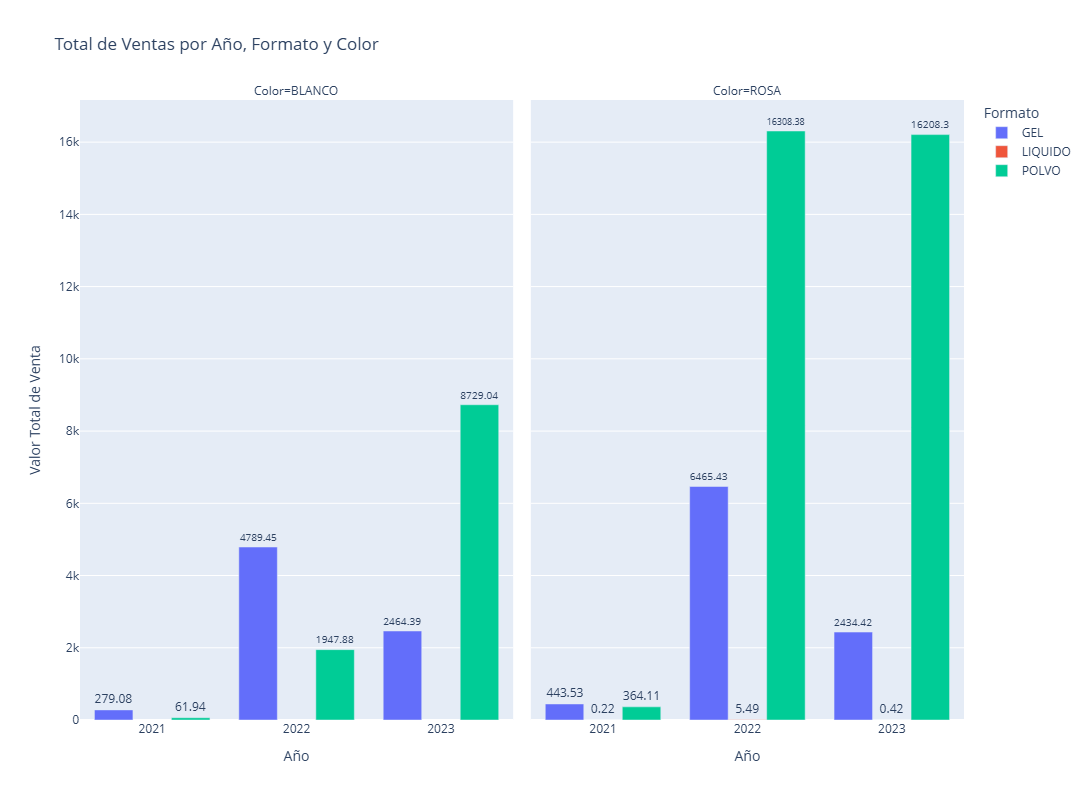

In [3]:
fig = px.bar(
    dfYearFormatAtts,
    x='YEAR',
    y='TOTAL_VALUE_SALES',
    text='TOTAL_VALUE_SALES',
    color='FORMAT',
    facet_col='ATTR3',
    title='Total de Ventas por Año, Formato y Color',
    barmode='group',
      labels={
        "YEAR": "Año",
        "TOTAL_VALUE_SALES": "Valor Total de Venta",
        "FORMAT": "Formato",
        "ATTR3": "Color"
    }
)
fig.update_traces(textangle=0, textposition="outside")
fig.update_layout(height=500 + 150*len(dfYearFormatAtts['ATTR3'].unique()))
fig.show()

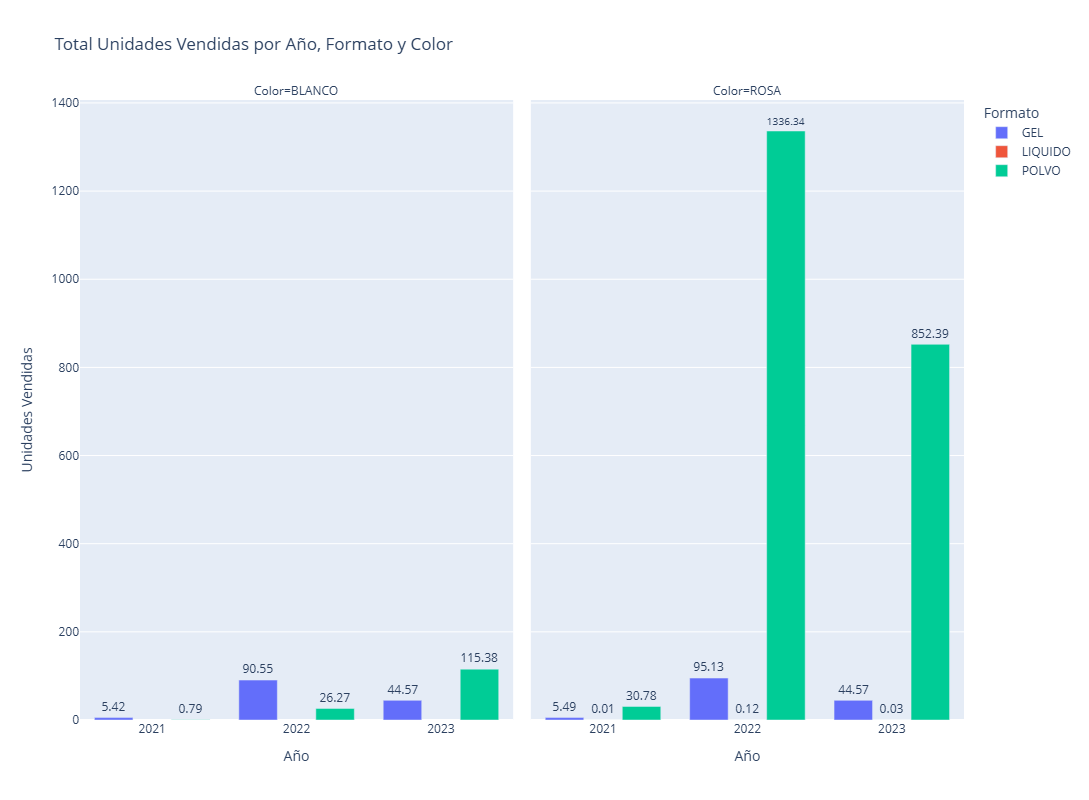

In [5]:
fig = px.bar(
    dfYearFormatAtts,
    x='YEAR',
    y='TOTAL_UNIT_SALES',
    text='TOTAL_UNIT_SALES',
    color='FORMAT',
    facet_col='ATTR3',
    title='Total Unidades Vendidas por Año, Formato y Color',
    barmode='group',
      labels={
        "YEAR": "Año",
        "TOTAL_UNIT_SALES": "Unidades Vendidas",
        "FORMAT": "Formato",
        "ATTR3": "Color"
    }
)
fig.update_traces(textangle=0, textposition="outside")
fig.update_layout(height=500 + 150*len(dfYearFormatAtts['ATTR3'].unique()))
fig.show()